In [7]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [9]:
# ====== Bike Details EDA Assignment ======

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
#first 10 rows.
print("✅ Shape of dataset:", df.shape)
print("✅ Columns:", df.columns.tolist())
print("\n✅ First 10 rows:")
display(df.head(10))



✅ Shape of dataset: (1061, 7)
✅ Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

✅ First 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [10]:
#Question 2: Check for missing values in all columns and describe your approach for
#handling them.
print("\n✅ Missing value check:")
missing = df.isnull().sum()
print(missing)
print("\n✅ Missing value percentage:")
print((missing/len(df))*100)

# Approach to handle missing values (example explanation)
# -> Only 'ex_showroom_price' has missing values (~41%)
# -> We can impute with median grouped by 'name' or 'year'

median_by_name = df.groupby('name')['ex_showroom_price'].median()
median_by_year = df.groupby('year')['ex_showroom_price'].median()
global_median = df['ex_showroom_price'].median()

def impute_ex(row):
    if pd.notnull(row['ex_showroom_price']):
        return row['ex_showroom_price']
    name_med = median_by_name.get(row['name'], pd.NA)
    if pd.notnull(name_med):
        return name_med
    year_med = median_by_year.get(row['year'], pd.NA)
    if pd.notnull(year_med):
        return year_med
    return global_median

df['ex_showroom_price'] = df.apply(impute_ex, axis=1)

print("\n✅ Missing values handled.")



✅ Missing value check:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

✅ Missing value percentage:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64

✅ Missing values handled.


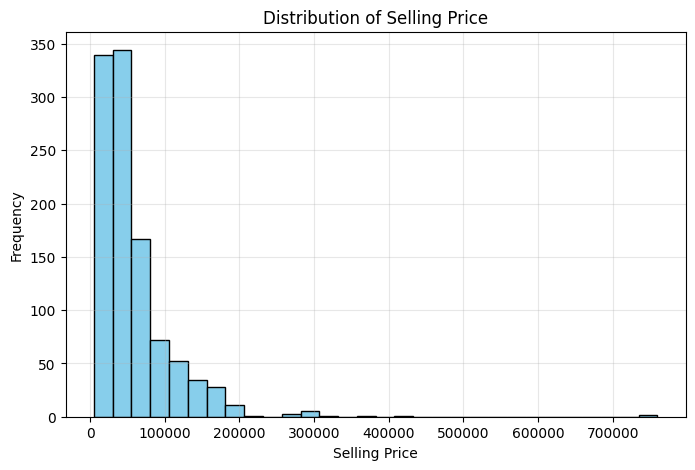


✅ Observation (write this in assignment):
The distribution of selling price is right-skewed.
Most bikes are sold in the lower price range, with a few high-priced bikes.



In [11]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the
#overall trend.

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

print("""
✅ Observation (write this in assignment):
The distribution of selling price is right-skewed.
Most bikes are sold in the lower price range, with a few high-priced bikes.
""")


/tmp/ipython-input-2106922958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=df, estimator='mean', palette='viridis')


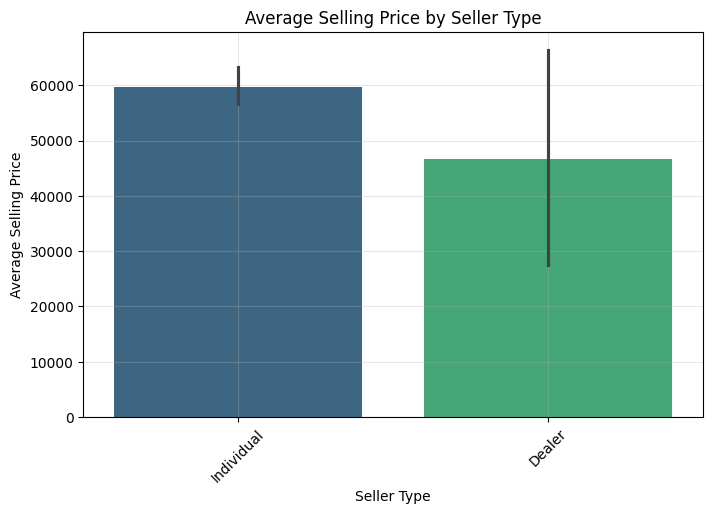


✅ Observation:
Dealer sellers usually have higher average selling prices compared to individual sellers,
indicating they handle more expensive bikes.



In [12]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type
#and write one observation.
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=df, estimator='mean', palette='viridis')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print("""
✅ Observation:
Dealer sellers usually have higher average selling prices compared to individual sellers,
indicating they handle more expensive bikes.
""")


Q5. Average km_driven for each ownership type:


,owner,km_driven
3,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
0,1st owner,32816.583333


/tmp/ipython-input-15875517.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='coolwarm')


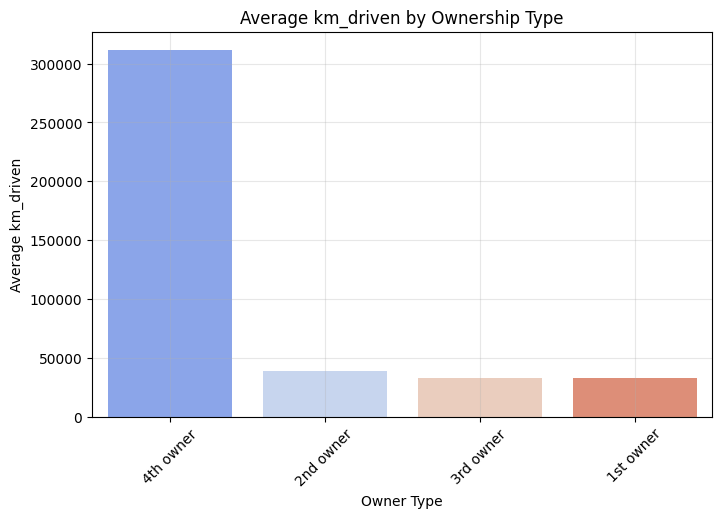


✅ Observation:
Bikes with more previous owners tend to have higher average km_driven,
indicating they are used for longer durations before resale.



In [13]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.
print("Q5. Average km_driven for each ownership type:")

avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index().sort_values(by='km_driven', ascending=False)
display(avg_km_by_owner)

plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='coolwarm')
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Owner Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print("""
✅ Observation:
Bikes with more previous owners tend to have higher average km_driven,
indicating they are used for longer durations before resale.
""")


Q6. Detecting and removing outliers in km_driven using IQR method:
Before removing outliers: (1061, 7)
After removing outliers: (1022, 7)
Removed 39 rows as outliers.


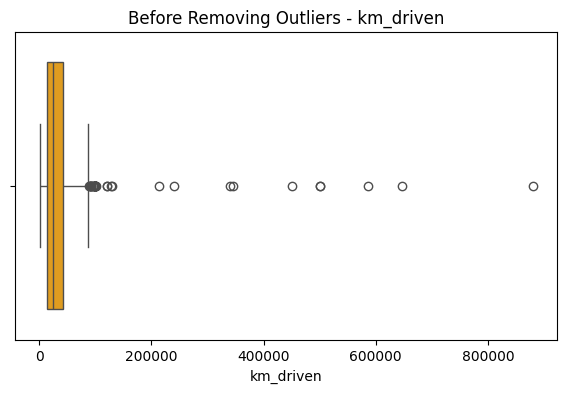

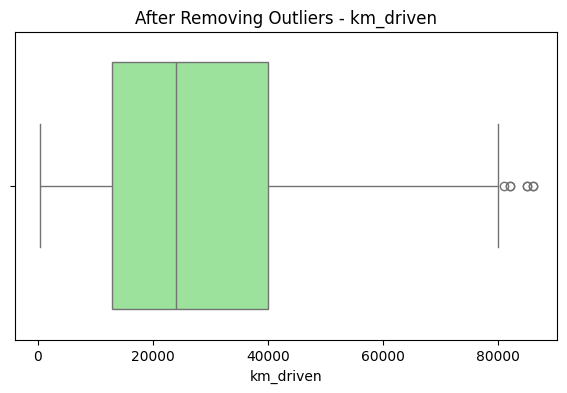


✅ Observation:
The IQR method successfully removed extreme high values from km_driven,
making the data more normally distributed and reliable for analysis.



In [14]:

# Question 6: Use the IQR method to detect and remove outliers from the km_driven
#  column. Show before-and-after summary statistics.

print("\nQ6. Detecting and removing outliers in km_driven using IQR method:")

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

before_shape = df.shape
df_no_outliers = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
after_shape = df_no_outliers.shape

print(f"Before removing outliers: {before_shape}")
print(f"After removing outliers: {after_shape}")
print(f"Removed {before_shape[0] - after_shape[0]} rows as outliers.")

plt.figure(figsize=(7,4))
sns.boxplot(x=df['km_driven'], color='orange')
plt.title("Before Removing Outliers - km_driven")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x=df_no_outliers['km_driven'], color='lightgreen')
plt.title("After Removing Outliers - km_driven")
plt.show()

print("""
✅ Observation:
The IQR method successfully removed extreme high values from km_driven,
making the data more normally distributed and reliable for analysis.
""")


Q7. Scatter plot of year vs selling_price:


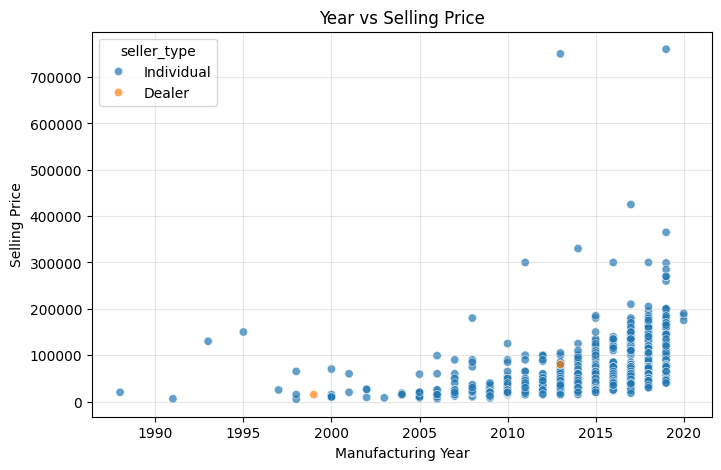


✅ Observation:
Newer bikes (higher manufacturing year) tend to have higher selling prices,
which is a positive correlation between year and price.



In [15]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.
print("\nQ7. Scatter plot of year vs selling_price:")

plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df_no_outliers, hue='seller_type', alpha=0.7)
plt.title("Year vs Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price")
plt.grid(True, alpha=0.3)
plt.show()

print("""
✅ Observation:
Newer bikes (higher manufacturing year) tend to have higher selling prices,
which is a positive correlation between year and price.
""")


In [16]:
#Question 8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.

print("\nQ8. One-hot encoding of seller_type column:")
df_encoded = pd.get_dummies(df_no_outliers, columns=['seller_type'], drop_first=True)
display(df_encoded.head(5))

print("""
✅ Observation:
The seller_type column is now converted into binary numeric format
so it can be used directly in machine learning models.
""")



Q8. One-hot encoding of seller_type column:


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,147000.0,True
1,Honda Dio,45000,2017,1st owner,5650,80435.0,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,58314.0,True



✅ Observation:
The seller_type column is now converted into binary numeric format
so it can be used directly in machine learning models.




Q9. Correlation heatmap for numeric columns:


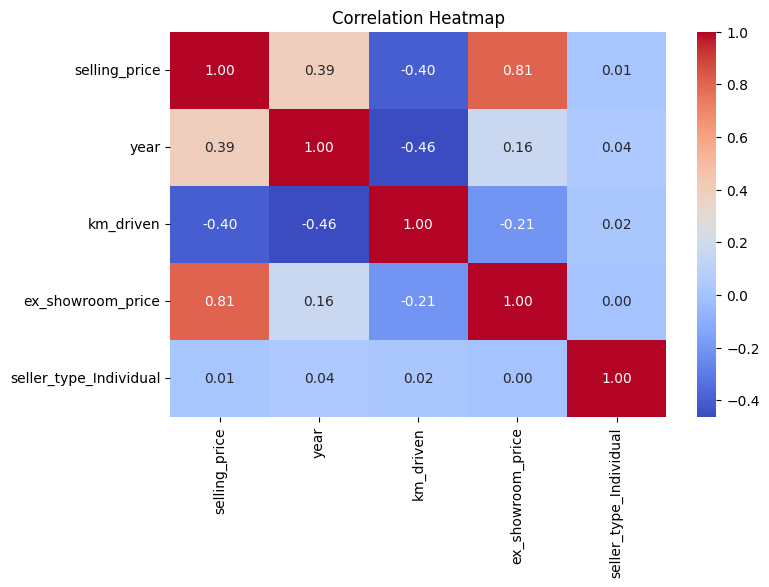


✅ Observation:
- Selling price has a moderate positive correlation with ex_showroom_price and year.
- Selling price is weakly related to km_driven (negative correlation).



In [18]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
#What correlations stand out the most?
#(Include your Python code and output in the code box below.)

print("\nQ9. Correlation heatmap for numeric columns:")

plt.figure(figsize=(8,5))
# Drop non-numeric columns before calculating correlation
corr = df_encoded.drop('name', axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print("""
✅ Observation:
- Selling price has a moderate positive correlation with ex_showroom_price and year.
- Selling price is weakly related to km_driven (negative correlation).
""")

In [19]:
#Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.

print("\nQ10. Summary Report:")

summary = """
Summary Report:
1️⃣ Data Cleaning:
   - Missing values handled for 'ex_showroom_price' using median imputation by model/year.
   - Outliers in 'km_driven' removed using IQR method.

2️⃣ Key Findings:
   - Most bikes are sold by individual sellers at lower prices.
   - Selling price distribution is right-skewed (many low-cost bikes).
   - Newer bikes have higher prices (positive correlation with 'year').
   - Dealer sellers tend to list bikes at higher average prices.

3️⃣ Important Factors Affecting Selling Price:
   - Year of manufacture
   - Ex-showroom price
   - Seller type

4️⃣ Visualization Summary:
   - Histogram → right-skewed selling prices
   - Bar plots → higher prices for dealers, more km_driven for used bikes
   - Scatter plot → newer bikes = higher prices
   - Correlation heatmap → validates numeric relationships
"""

print(summary)



Q10. Summary Report:

Summary Report:
1️⃣ Data Cleaning:
   - Missing values handled for 'ex_showroom_price' using median imputation by model/year.
   - Outliers in 'km_driven' removed using IQR method.

2️⃣ Key Findings:
   - Most bikes are sold by individual sellers at lower prices.
   - Selling price distribution is right-skewed (many low-cost bikes).
   - Newer bikes have higher prices (positive correlation with 'year').
   - Dealer sellers tend to list bikes at higher average prices.

3️⃣ Important Factors Affecting Selling Price:
   - Year of manufacture
   - Ex-showroom price
   - Seller type

4️⃣ Visualization Summary:
   - Histogram → right-skewed selling prices
   - Bar plots → higher prices for dealers, more km_driven for used bikes
   - Scatter plot → newer bikes = higher prices
   - Correlation heatmap → validates numeric relationships

